## Data Overview 

In [210]:
# load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_bar, aes, theme, element_text
from wordcloud import WordCloud

#ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

In [211]:
# load cleaned data 

df = pd.read_csv("cleanedData.csv")
df.head(10)

,ID,IUCR,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Time,Month,Day,DayofWeek,Date,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE
0,5223506,2825,RESIDENCE,False,True,2122,2.0,26,2007,00:00:00,Jan,3,Wednesday,2007-01-03,OTHER OFFENSE,HARASSMENT BY TELEPHONE,N
1,5224416,1320,STREET,False,False,1323,12.0,14,2007,00:00:00,Jan,4,Thursday,2007-01-04,CRIMINAL DAMAGE,TO VEHICLE,N
2,5224520,5002,STREET,True,False,111,1.0,26,2007,00:00:00,Jan,5,Friday,2007-01-05,OTHER OFFENSE,OTHER VEHICLE OFFENSE,N
3,5225556,1320,STREET,False,False,111,1.0,14,2007,00:00:00,Jan,5,Friday,2007-01-05,CRIMINAL DAMAGE,TO VEHICLE,N
4,5227933,2024,STREET,True,False,2323,19.0,18,2007,00:00:00,Jan,4,Thursday,2007-01-04,NARCOTICS,POSS: HEROIN(WHITE),N
5,5227797,2094,SIDEWALK,True,False,1532,15.0,18,2007,00:00:00,Jan,5,Friday,2007-01-05,NARCOTICS,ATTEMPT POSSESSION CANNABIS,N
6,5242118,1811,STREET,True,False,2422,24.0,18,2007,00:00:00,Jan,7,Sunday,2007-01-07,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,N
7,5242417,0460,SIDEWALK,False,False,726,7.0,08B,2007,00:00:00,Jan,13,Saturday,2007-01-13,BATTERY,SIMPLE,U
8,5243014,0460,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,08B,2007,00:00:00,Jan,13,Saturday,2007-01-13,BATTERY,SIMPLE,U
9,5243687,0850,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,06,2007,00:00:00,Jan,14,Sunday,2007-01-14,THEFT,ATTEMPT THEFT,U


In [212]:
df.shape

(3423496, 17)

#### Data Description 

The dataset obtained from Kaggle, containing 3423496 records of crime along with 17 features that reflect on the reported incidents of crime that occurred in the City of Chicago from 2007 to 2017.

- ID - Unique identifier for the record.

- IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- Location Description - Description of the location where the incident occurred.

- Arrest - Indicates whether an arrest was made.

- Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- Year - Year when the incident occurred 

- Month - Month when the incident occurred 

- Day - Day when the incident occurred 

- DayofWeek - Day of week when the incident occurred 

- Date - Date when the incident occurred. this is sometimes a best estimate.

- PRIMARY DESCRIPTION - The primary description of the IUCR code.

- SECONDARY DESCRIPTION - The secondary description of the IUCR code, a subcategory of the primary description.

- INDEX CODE - Index offenses are the offenses that are collected nation-wide by the Federal Bureaus of Investigation’s Uniform Crime Reports program to document crime trends over time (data released semi-annually)

#### Basic Visualization and Characteristics 

In [213]:
df.nunique()

ID                       3423496
IUCR                         386
Location Description         157
Arrest                         2
Domestic                       2
Beat                         303
District                      25
FBI Code                      26
Year                          10
Time                           1
Month                         12
Day                           31
DayofWeek                      7
Date                        3653
PRIMARY DESCRIPTION           32
SECONDARY DESCRIPTION        364
INDEX CODE                     3
dtype: int64

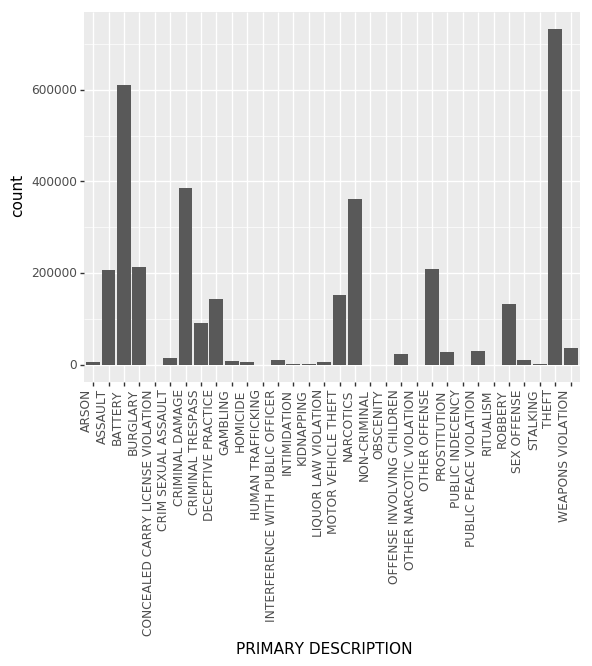

<ggplot: (-9223372028937633511)>

In [214]:
# Plot the Counts for all PRIMARY DESCRIPTION
(ggplot(df) +
 geom_bar(aes('PRIMARY DESCRIPTION')) +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
)

Text(0,0.5,'')

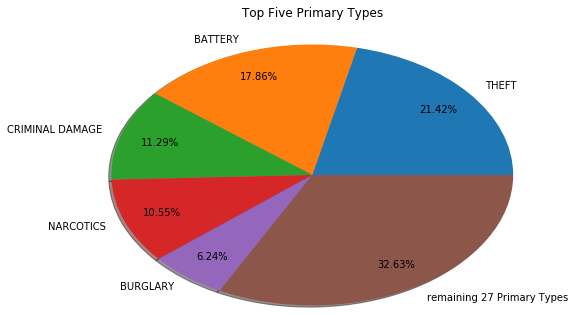

In [215]:
# Plot the Top Five Primary Types with Pie Chart 
counts = df['PRIMARY DESCRIPTION'].value_counts()
top5PT = counts.head(5)

if len(counts) > 5:
    top5PT['remaining {0} Primary Types'.format(len(counts) - 5)] = sum(counts[5:])
top5PT.plot.pie(autopct='%1.2f%%', pctdistance = 0.8, shadow = True, radius = 1.5)
plt.title("Top Five Primary Types", y=1.2)
plt.ylabel('')

We observed that the top five crimes in the city of Chicago are Theft, Battery, Ciminal Damage, Narcotics and Burglary. With the crims of theft taking 22% of the crime rates.

In [216]:
# if we wamt to explore just one primary type
df[df['PRIMARY DESCRIPTION'] == 'THEFT']['SECONDARY DESCRIPTION'].value_counts()

$500 AND UNDER                      263540
OVER $500                           179599
FROM BUILDING                       125927
RETAIL THEFT                         94079
FINANCIAL ID THEFT: OVER $300        23364
POCKET-PICKING                       19646
PURSE-SNATCHING                       9145
FINANCIAL ID THEFT:$300 &UNDER        7612
ATTEMPT THEFT                         5801
ATTEMPT FINANCIAL IDENTITY THEFT      2207
AGG: FINANCIAL ID THEFT               1621
FROM COIN-OP MACHINE/DEVICE            468
DELIVERY CONTAINER THEFT               393
$300 AND UNDER                           6
OVER $300                                6
THEFT RETAIL                             1
Name: SECONDARY DESCRIPTION, dtype: int64

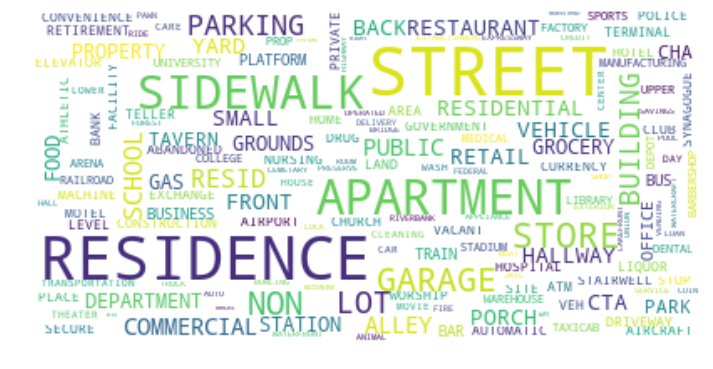

In [217]:
# word cloud for locations 

# Exported the PD column into world cloud 
with open('output.txt', 'w') as f:
    for text in df['Location Description'].tolist():
        f.write(text + '\n')
        
# Read the whole text.
text = open('output.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40, collocations=False, background_color="white", 
                     contour_color='steelblue').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0,0.5,'')

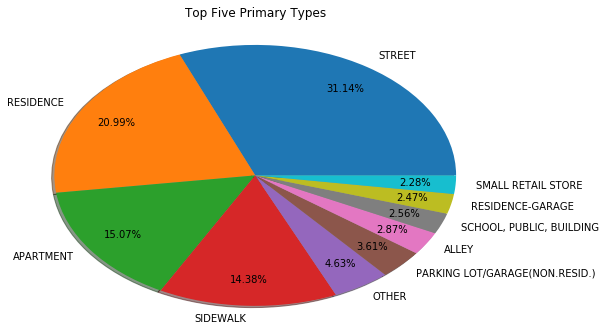

In [218]:
# Plot the Top Ten Locations with Pie Chart 
counts = df['Location Description'].value_counts()
top10L = counts.head(10)

if len(counts) > 10:
    top5PT['remaining {0} Primary Types'.format(len(counts) - 10)] = sum(counts[10:])
top10L.plot.pie(autopct='%1.2f%%', pctdistance = 0.8, shadow = True, radius = 1.5)
plt.title("Top Five Primary Types", y=1.2)
plt.ylabel('')

Side vs Street?? whats the difference?

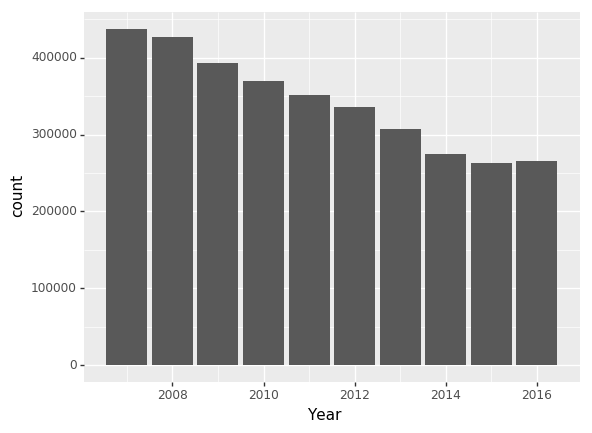

<ggplot: (-9223372028937633532)>

In [219]:
# Crime rates vs Year

# Number of crimes Per Year.
(ggplot(df) +
 geom_bar(aes('Year'))
)